In [41]:
import numpy as np
import matplotlib.pyplot as plt

class LangevinEquation:
    def __init__(self, gamma, sigma):
        self.gamma = gamma
        self.sigma = sigma
        
    def __call__(self, x, t):
        return -self.gamma * x + self.sigma * np.random.normal()
        
class ItoEquation:
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
        
    def __call__(self, x, t):
        return self.alpha * x + self.beta * np.random.normal()

class RandomProcess:
    def __init__(self, sde, x0, tspan, dt):
        self.sde = sde
        self.x0 = x0
        self.tspan = tspan
        self.dt = dt
        
    
    def generate_trajectory(self):
        ts = np.arange(self.tspan[0], self.tspan[1], self.dt)
        xs = np.zeros(len(ts))
        xs[0] = self.x0
        for i in range(1, len(ts)):
            dt = ts[i] - ts[i-1]
            x = xs[i-1]
            f = self.sde(x, ts[i-1])
            if isinstance(self.sde, LangevinEquation):
                xs[i] = x + f * dt + self.sde.sigma * np.sqrt(dt) * np.random.normal()
            elif isinstance(self.sde, ItoEquation):
                xs[i] = x + f * dt + self.sde.beta * np.sqrt(dt) * np.random.normal()
            else:
                raise ValueError('Invalid SDE type')
        return xs

    


def plot_stochastic_process(sde_type, params, x0, tspan, dt):
    if sde_type == 'Langevin':
        sde = LangevinEquation(*params)
    elif sde_type == 'Ito':
        sde = ItoEquation(*params)
    else:
        raise ValueError('Invalid SDE type')
        
    rp = RandomProcess(sde, x0, tspan, dt)
    trajectory = rp.generate_trajectory()

    plt.plot(trajectory)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.title(f'{sde_type} process with parameters {params}')
    plt.show()


Функция plot_stochastic_process() принимает четыре аргумента:


sde_type - тип стохастического дифференциального уравнения, который может быть 'Langevin' или 'Ito'.

params - список параметров для уравнения. Для уравнения Ланжевена это [gamma, sigma], а для уравнения Ито это [alpha, beta].

x0 - начальное значение процесса.

tspan - интервал времени, на котором нужно сгенерировать траекторию процесса.

dt - шаг дискретизации.


Функция создает объект процесса с помощью классов LangevinEquation или ItoEquation, в зависимости от выбранного типа уравнения. Затем она создает объект случайного процесса с помощью класса RandomProcess и генерирует траекторию процесса.

Пример:
Уравнение Ланжевена
 $$\frac{dx}{dt} = -\gamma x + \sigma \frac{dW}{dt}$$


где $x$ - это случайный процесс, $\gamma$ и $\sigma$ - коэффициенты, $W$ - винеровский процесс, а $\frac{dW}{dt}$ - производная винеровского процесса.

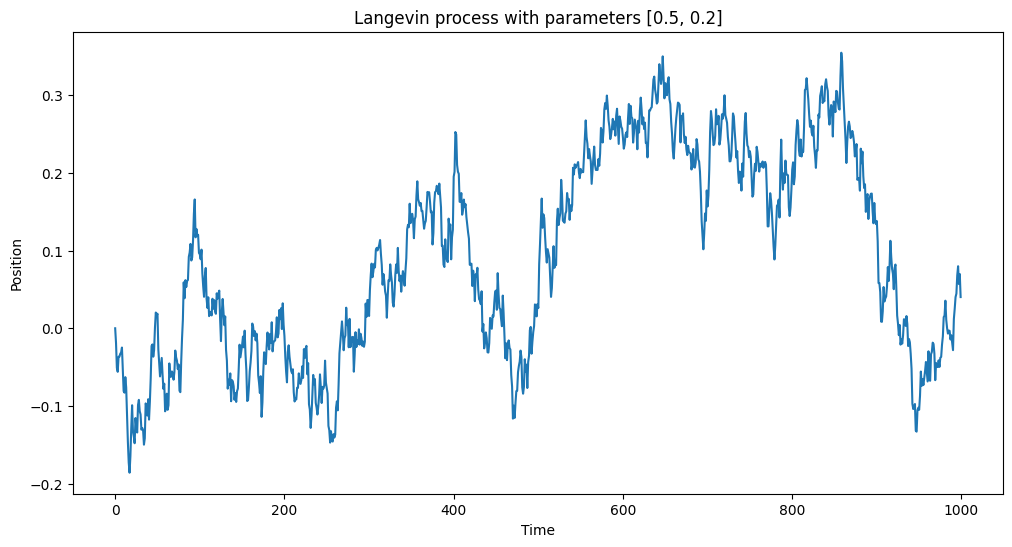

In [42]:
plot_stochastic_process('Langevin', [0.5, 0.2], 0, [0, 10], 0.01)

Пример: 
Уравнение Ито

$$dx = \alpha(x,t) dt + \beta(x,t) dW$$


где $x$ - это случайный процесс, $\alpha(x,t)$ и $\beta(x,t)$ - функции, $W$ - винеровский процесс, а $dW$ - дифференциал винеровского процесса.

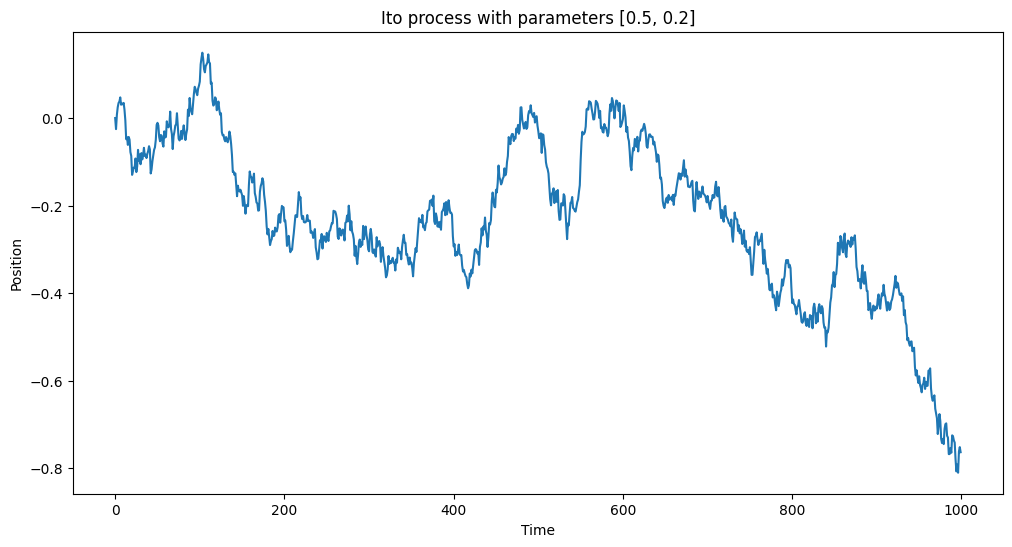

In [44]:
plot_stochastic_process('Ito', [0.5, 0.2], 0, [0, 10], 0.01)